In [125]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model, cross_validation

pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [13]:
df = pd.read_csv(os.path.join('datasets', 'auto-mpg.csv'))
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [15]:
model = smf.ols(formula = 'mpg ~ cylinders', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           4.50e-81
Time:                        18:54:56   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     42.9493      0.833     51.557      0.000        41.312    44.587
cylinders     -3.5629      0.146    -24.435      0.000        -3.850    -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model = smf.ols(formula = 'mpg ~ displacement', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           1.66e-91
Time:                        18:55:38   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       35.1748      0.492     71.519      0.000        34.208    36.142
displacement    -0.0603      0.002    -26.926      0.000        -0.065    -0.056
==============================================================================
Omnibus:                       41.373   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.024
Skew:                           0.711   Prob(JB):                     9.24e-14
Kurtosis:                       4.264   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model = smf.ols(formula = 'mpg ~ horsepower', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           7.03e-81
Time:                        18:56:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model = smf.ols(formula = 'mpg ~ weight', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          2.97e-103
Time:                        18:56:24   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000        44.754    47.881
weight        -0.0077      0.000    -29.814      0.000        -0.008    -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model = smf.ols(formula = 'mpg ~ acceleration', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           1.82e-18
Time:                        18:56:47   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        4.9698      2.043      2.432      0.015         0.953     8.987
acceleration     1.1912      0.129      9.217      0.000         0.937     1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model = smf.ols(formula = 'mpg ~ model_year', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     200.0
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           4.84e-37
Time:                        18:57:02   Log-Likelihood:                -1301.2
No. Observations:                 398   AIC:                             2606.
Df Residuals:                     396   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -69.5556      6.589    -10.556      0.000       -82.510   -56.602
model_year     1.2244      0.087     14.141      0.000         1.054     1.395
==============================================================================
Omnibus:                       22.686   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.247
Skew:                           0.383   Prob(JB):                     0.000297
Kurtosis:                       2.373   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model = smf.ols(formula = 'mpg ~ origin', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     184.2
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           1.01e-34
Time:                        18:57:29   Log-Likelihood:                -1306.6
No. Observations:                 398   AIC:                             2617.
Df Residuals:                     396   BIC:                             2625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.8783      0.714     20.835      0.000        13.474    16.282
origin         5.4908      0.405     13.572      0.000         4.695     6.286
==============================================================================
Omnibus:                       25.653   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.150
Skew:                           0.661   Prob(JB):                     4.68e-07
Kurtosis:                       3.106   Cond. No.                         4.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# model = smf.ols(formula = 'mpg ~ car_name', data = df).fit()

# model.summary()

In [26]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


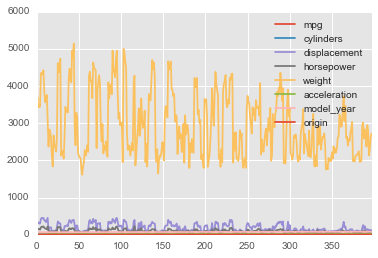

In [27]:
df.plot()

In [28]:
df = df.drop('origin', 1)

In [29]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,amc ambassador dpl


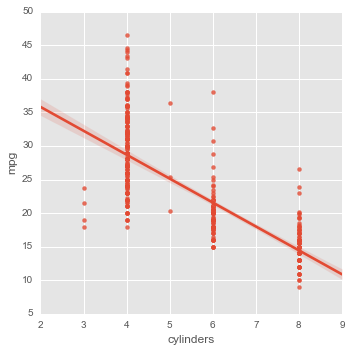

In [34]:
sns.lmplot('cylinders', 'mpg', df)

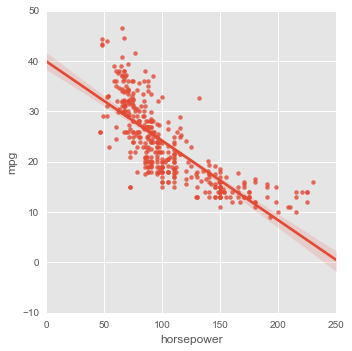

In [35]:
sns.lmplot('horsepower', 'mpg', df)

In [31]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [39]:
df[ ['displacement_sqrt', 'horsepower_sqrt', 'mpg_sqrt'] ] = df[ ['displacement', 'horsepower', 'mpg'] ].apply(np.sqrt)

In [48]:
df[ ['weight_log', 'displacement_log','horsepower_log', 'mpg_log'] ] = df[ ['weight', 'displacement', 'horsepower', 'mpg_log'] ].apply(np.log)

In [41]:
df

,mpg,cylinders,displacement,horsepower,weight,...,model_year,car_name,displacement_sqrt,horsepower_sqrt,mpg_sqrt
0,18.0,8,307.0,130.0,3504.0,...,70,chevrolet chevelle malibu,17.521415,11.401754,4.242641
1,15.0,8,350.0,165.0,3693.0,...,70,buick skylark 320,18.708287,12.845233,3.872983
2,18.0,8,318.0,150.0,3436.0,...,70,plymouth satellite,17.832555,12.247449,4.242641
3,16.0,8,304.0,150.0,3433.0,...,70,amc rebel sst,17.435596,12.247449,4.000000
4,17.0,8,302.0,140.0,3449.0,...,70,ford torino,17.378147,11.832160,4.123106
5,15.0,8,429.0,198.0,4341.0,...,70,ford galaxie 500,20.712315,14.071247,3.872983
6,14.0,8,454.0,220.0,4354.0,...,70,chevrolet impala,21.307276,14.832397,3.741657
7,14.0,8,440.0,215.0,4312.0,...,70,plymouth fury iii,20.976177,14.662878,3.741657
8,14.0,8,455.0,225.0,4425.0,...,70,pontiac catalina,21.330729,15.000000,3.741657
9,15.0,8,390.0,190.0,3850.0,...,70,amc ambassador dpl,19.748418,13.784049,3.872983


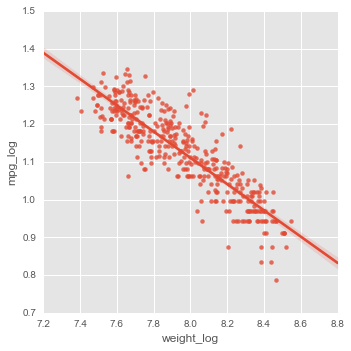

In [49]:
sns.lmplot('weight_log', 'mpg_log', df)

In [69]:
df['weight_inv'] = 1.0/df.weight
df['gpm'] = 1.0/df.mpg
df.gpm
df.corr()

,mpg,cylinders,displacement,horsepower,weight,...,mpg_log,weight_log,weight_inv,mpg_inv,gpm
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,...,0.971244,-0.843979,0.840724,-0.935364,-0.935364
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,...,-0.834067,0.882085,-0.848695,0.839278,0.839278
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,...,-0.861793,0.918805,-0.887313,0.866631,0.866631
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,...,-0.841637,0.845609,-0.814147,0.854809,0.854809
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,...,-0.882501,0.991420,-0.966142,0.885219,0.885219
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,...,0.451001,-0.401921,0.382186,-0.455750,-0.455750
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,...,0.571998,-0.284009,0.257196,-0.557427,-0.557427
displacement_sqrt,-0.828392,0.942217,0.979369,0.854590,0.936372,...,-0.862705,0.942698,-0.930481,0.855484,0.855484
horsepower_sqrt,-0.817517,0.843204,0.886477,0.980201,0.876483,...,-0.854687,0.873956,-0.858244,0.853836,0.853836
mpg_sqrt,0.983776,-0.825758,-0.853619,-0.830155,-0.875567,...,0.998123,-0.874469,0.857746,-0.982971,-0.982971


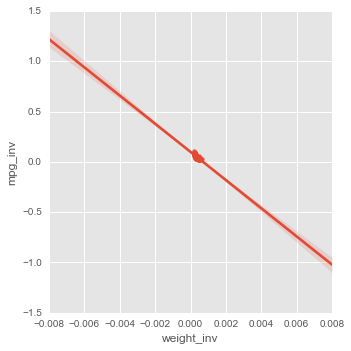

In [60]:
sns.lmplot('weight_inv', 'mpg_inv', df)

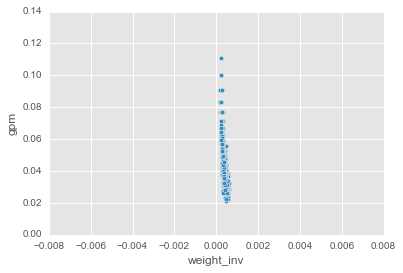

In [65]:
df.plot.scatter(x = 'weight_inv', y = 'gpm')

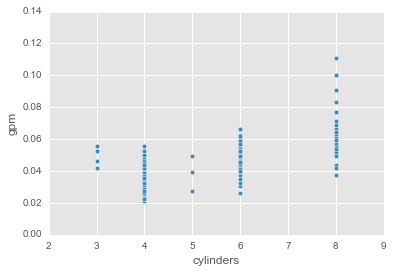

In [67]:
df.plot.scatter(x = 'cylinders', y = 'gpm')

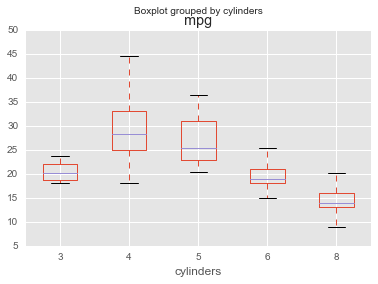

In [74]:
df.boxplot('mpg', 'cylinders')

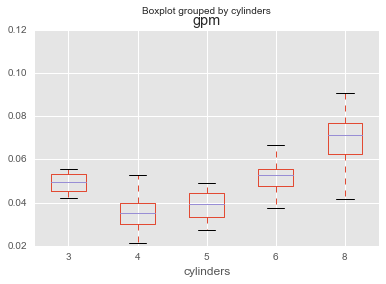

In [75]:
df.boxplot('gpm', 'cylinders')

In [76]:
df.corr().cylinders

mpg                 -0.775396
cylinders            1.000000
displacement         0.950721
horsepower           0.842983
weight               0.896017
acceleration        -0.505419
model_year          -0.348746
displacement_sqrt    0.942217
horsepower_sqrt      0.843204
mpg_sqrt            -0.825758
displacement_log     0.942217
horsepower_log       0.843204
mpg_log             -0.834067
weight_log           0.882085
weight_inv          -0.848695
mpg_inv              0.839278
gpm                  0.839278
Name: cylinders, dtype: float64

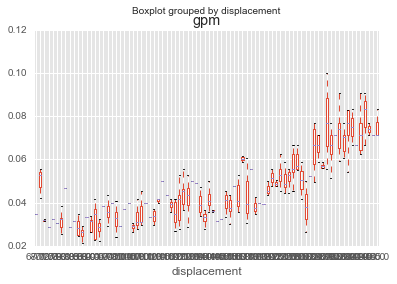

In [77]:
df.boxplot('gpm', 'displacement')

In [81]:
df.corr().gpm.sort_values()

mpg_log             -0.992368
mpg_sqrt            -0.982971
mpg                 -0.935364
weight_inv          -0.839501
model_year          -0.557427
acceleration        -0.455750
cylinders            0.839278
horsepower_log       0.853836
horsepower_sqrt      0.853836
horsepower           0.854809
displacement_sqrt    0.855484
displacement_log     0.855484
displacement         0.866631
weight_log           0.869729
weight               0.885219
mpg_inv              1.000000
gpm                  1.000000
Name: gpm, dtype: float64

In [85]:
model = smf.ols(formula = 'gpm ~ weight', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1434.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          1.08e-133
Time:                        20:16:52   Log-Likelihood:                 1371.8
No. Observations:                 398   AIC:                            -2740.
Df Residuals:                     396   BIC:                            -2732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0038      0.001     -2.715      0.007        -0.007    -0.001
weight      1.734e-05   4.58e-07     37.869      0.000      1.64e-05  1.82e-05
==============================================================================
Omnibus:                       38.100   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.018
Skew:                           0.520   Prob(JB):                     1.55e-18
Kurtosis:                       4.966   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
model = smf.ols(formula = 'gpm ~ displacement_sqrt', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1081.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          3.08e-115
Time:                        20:19:26   Log-Likelihood:                 1329.1
No. Observations:                 398   AIC:                            -2654.
Df Residuals:                     396   BIC:                            -2646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.0892      0.004    -21.310      0.000        -0.097    -0.081
displacement_sqrt     0.0267      0.001     32.875      0.000         0.025     0.028
==============================================================================
Omnibus:                       83.296   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.438
Skew:                           0.876   Prob(JB):                     1.93e-69
Kurtosis:                       7.002   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model = smf.ols(formula = 'gpm ~ horsepower_sqrt', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1049.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          1.24e-112
Time:                        20:20:13   Log-Likelihood:                 1305.8
No. Observations:                 392   AIC:                            -2608.
Df Residuals:                     390   BIC:                            -2600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.1420      0.006    -24.165      0.000        -0.154    -0.130
horsepower_sqrt     0.0414      0.001     32.393      0.000         0.039     0.044
==============================================================================
Omnibus:                       28.670   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.391
Skew:                           0.524   Prob(JB):                     6.24e-10
Kurtosis:                       4.223   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model = smf.ols(formula = 'gpm ~ weight + displacement_sqrt + horsepower_sqrt', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     552.5
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          1.24e-139
Time:                        20:25:50   Log-Likelihood:                 1375.7
No. Observations:                 392   AIC:                            -2743.
Df Residuals:                     388   BIC:                            -2728.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.0667      0.009     -7.300      0.000        -0.085    -0.049
weight             1.043e-05   1.32e-06      7.927      0.000      7.84e-06   1.3e-05
displacement_sqrt     0.0024      0.002      1.171      0.242        -0.002     0.006
horsepower_sqrt       0.0155      0.002      6.631      0.000         0.011     0.020
==============================================================================
Omnibus:                       33.559   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.309
Skew:                           0.509   Prob(JB):                     1.79e-14
Kurtosis:                       4.685   Cond. No.                     7.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
model = smf.ols(formula = 'gpm ~ weight + displacement + horsepower', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     572.9
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          4.07e-142
Time:                        20:26:03   Log-Likelihood:                 1381.5
No. Observations:                 392   AIC:                            -2755.
Df Residuals:                     388   BIC:                            -2739.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.0001      0.002     -0.061      0.952        -0.004     0.004
weight        1.031e-05    1.2e-06      8.559      0.000      7.94e-06  1.27e-05
displacement  1.332e-05   1.11e-05      1.197      0.232     -8.55e-06  3.52e-05
horsepower       0.0001   2.17e-05      6.484      0.000      9.79e-05     0.000
==============================================================================
Omnibus:                       23.564   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.707
Skew:                           0.390   Prob(JB):                     1.45e-09
Kurtosis:                       4.373   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
subset_df = df.dropna(axis = 'index', subset = ['horsepower'])

In [97]:
model = smf.ols(formula = 'gpm ~ weight + displacement_sqrt + horsepower_sqrt', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     552.5
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          1.24e-139
Time:                        20:39:04   Log-Likelihood:                 1375.7
No. Observations:                 392   AIC:                            -2743.
Df Residuals:                     388   BIC:                            -2728.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.0667      0.009     -7.300      0.000        -0.085    -0.049
weight             1.043e-05   1.32e-06      7.927      0.000      7.84e-06   1.3e-05
displacement_sqrt     0.0024      0.002      1.171      0.242        -0.002     0.006
horsepower_sqrt       0.0155      0.002      6.631      0.000         0.011     0.020
==============================================================================
Omnibus:                       33.559   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.309
Skew:                           0.509   Prob(JB):                     1.79e-14
Kurtosis:                       4.685   Cond. No.                     7.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
model = smf.ols(formula = 'gpm ~ weight + displacement + model_year', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     924.4
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          7.11e-178
Time:                        20:47:25   Log-Likelihood:                 1481.9
No. Observations:                 398   AIC:                            -2956.
Df Residuals:                     394   BIC:                            -2940.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.1083      0.007     15.920      0.000         0.095     0.122
weight        1.337e-05   9.73e-07     13.747      0.000      1.15e-05  1.53e-05
displacement  1.864e-05   8.09e-06      2.303      0.022      2.73e-06  3.46e-05
model_year      -0.0014   8.64e-05    -15.830      0.000        -0.002    -0.001
==============================================================================
Omnibus:                       88.659   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.424
Skew:                           0.992   Prob(JB):                     3.86e-63
Kurtosis:                       6.660   Cond. No.                     7.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
model = smf.ols(formula = 'gpm ~ weight + horsepower_sqrt + model_year * horsepower_sqrt', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     715.2
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          2.89e-177
Time:                        20:51:35   Log-Likelihood:                 1466.9
No. Observations:                 392   AIC:                            -2924.
Df Residuals:                     387   BIC:                            -2904.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -0.0832      0.084     -0.990      0.323        -0.248     0.082
weight                       1.25e-05   7.17e-07     17.439      0.000      1.11e-05  1.39e-05
horsepower_sqrt                0.0424      0.018      2.302      0.022         0.006     0.079
model_year                     0.0007      0.001      0.664      0.507        -0.001     0.003
model_year:horsepower_sqrt    -0.0005      0.000     -1.840      0.067        -0.001  3.11e-05
==============================================================================
Omnibus:                       66.423   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.429
Skew:                           0.836   Prob(JB):                     1.97e-36
Kurtosis:                       5.696   Cond. No.                     9.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
model = smf.ols(formula = 'gpm ~ weight + horsepower', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     857.7
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          2.52e-143
Time:                        20:59:05   Log-Likelihood:                 1380.8
No. Observations:                 392   AIC:                            -2756.
Df Residuals:                     389   BIC:                            -2744.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0019      0.001     -1.441      0.150        -0.005     0.001
weight      1.133e-05    8.5e-07     13.330      0.000      9.66e-06   1.3e-05
horsepower     0.0002   1.88e-05      8.182      0.000         0.000     0.000
==============================================================================
Omnibus:                       21.179   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.827
Skew:                           0.389   Prob(JB):                     7.44e-08
Kurtosis:                       4.185   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# train_df = df.sample(frac = .6, random_state = 0)
# test_df = df.drop(train_df.index)

In [115]:
df = df.dropna(axis = 0, subset = ['gpm', 'cylinders', 'horsepower_sqrt', 'weight'])

In [116]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

In [118]:
df = pd.read_csv(os.path.join('datasets', 'auto-mpg.csv'))

df['gpm'] = 1. / df.mpg
df['horsepower_sqrt'] = np.sqrt(df.horsepower)

In [119]:
df = df.dropna(axis = 0, subset = ['gpm', 'displacement', 'horsepower_sqrt', 'weight'])

In [120]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

In [121]:
train_X = train_df[ ['cylinders', 'horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']

In [122]:
model = linear_model.LinearRegression()

In [129]:
model = linear_model.LinearRegression() #in parenthesis fit_intercept = False
model.fit(train_X, train_y)
print model.score(train_X, train_y)
print cross_validation.cross_val_score(model, train_X, train_y, cv = 10)

0.805493111137
[ 0.75466762  0.8887984   0.77708198  0.70424422  0.86105043  0.79444312
  0.75972253  0.88308893  0.65917071  0.70657673]


In [131]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.77888446719685667